In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('winequality(limpio).csv')
df_red = df[df['Red']==1]
df_red['density-kg/m^3']=df_red['density-kg/m^3']/1000
df_red.rename(columns={'density-kg/m^3':'density'}, inplace=True)
df_red=df_red.drop(['Red', 'White', 'quality classification'], axis = 1)
df_red

C:\Users\56981\AppData\Local\Temp\ipykernel_26388\3598465274.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_red['density-kg/m^3']=df_red['density-kg/m^3']/1000
C:\Users\56981\AppData\Local\Temp\ipykernel_26388\3598465274.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_red.rename(columns={'density-kg/m^3':'density'}, inplace=True)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,density
0,7.4,0.700,0.00,1.9,0.076,11.0,0.064516,3.51,0.56,9.4,5,0.99780
1,7.8,0.880,0.00,2.6,0.098,25.0,0.140553,3.20,0.68,9.8,5,0.99680
2,7.8,0.760,0.04,2.3,0.092,15.0,0.110599,3.26,0.65,9.8,5,0.99700
3,11.2,0.280,0.56,1.9,0.075,17.0,0.124424,3.16,0.58,9.8,6,0.99800
4,7.4,0.700,0.00,1.9,0.076,11.0,0.064516,3.51,0.56,9.4,5,0.99780
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.087558,3.45,0.58,10.5,5,0.99490
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.103687,3.52,0.76,11.2,6,0.99512
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.078341,3.42,0.75,11.0,6,0.99574
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.087558,3.57,0.71,10.2,5,0.99547


In [3]:
df.dtypes
df_red.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.390000,0.520000,0.640000,1.580000
citric acid,1599.0,0.270976,0.194801,0.00000,0.090000,0.260000,0.420000,1.000000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.900000,2.200000,2.600000,15.500000
chlorides,1599.0,0.087467,0.047065,0.01200,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1599.0,0.093244,0.075796,0.00000,0.036866,0.073733,0.129032,0.652074
pH,1599.0,3.311113,0.154386,2.74000,3.210000,3.310000,3.400000,4.010000
sulphates,1599.0,0.658149,0.169507,0.33000,0.550000,0.620000,0.730000,2.000000
alcohol,1599.0,10.422379,1.061917,8.40000,9.500000,10.200000,11.100000,14.900000


La calidad maxima obtenida por algun vino es 14,9 pero en promedio tenemos que no superan los 10,4, ademas podemos observar que

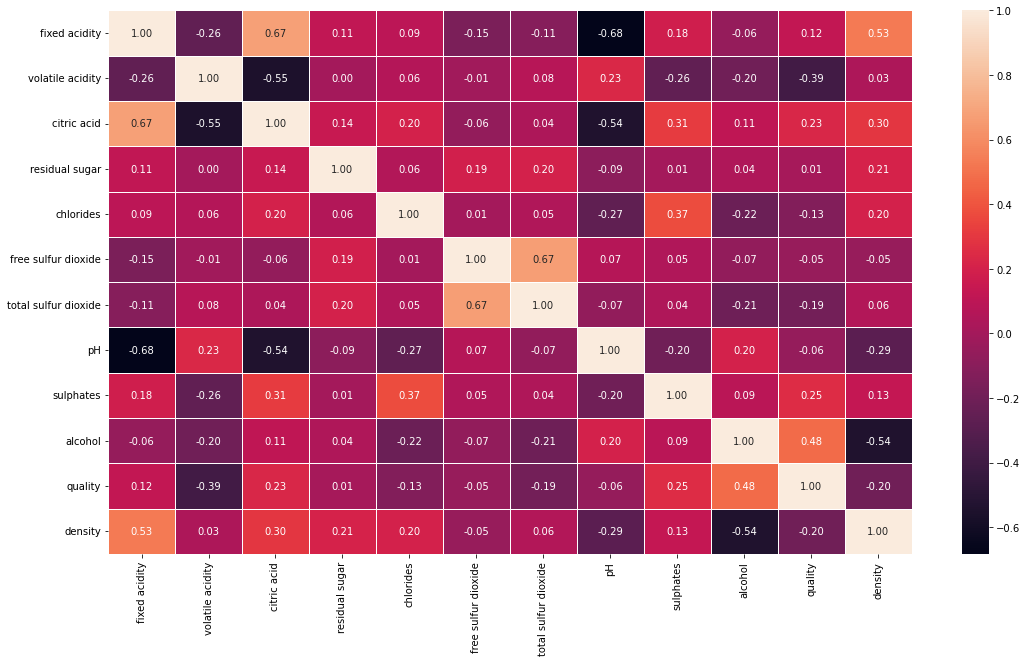

quality                 1.000000
alcohol                 0.475297
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
total sulfur dioxide   -0.185100
density                -0.197448
volatile acidity       -0.390558
Name: quality, dtype: float64

In [4]:
plt.figure(figsize = (18,10))
sns.heatmap(df_red.corr(),annot=True,fmt='.2f',linewidths =1)

plt.show()

correlacion = df_red.corr()
correlacion['quality'].sort_values(ascending=False)

En relacion a la tabla de correlacion la variable a predecir sera quality, en base a las variables alcohol, sulphates, citric acid, fixed acidity

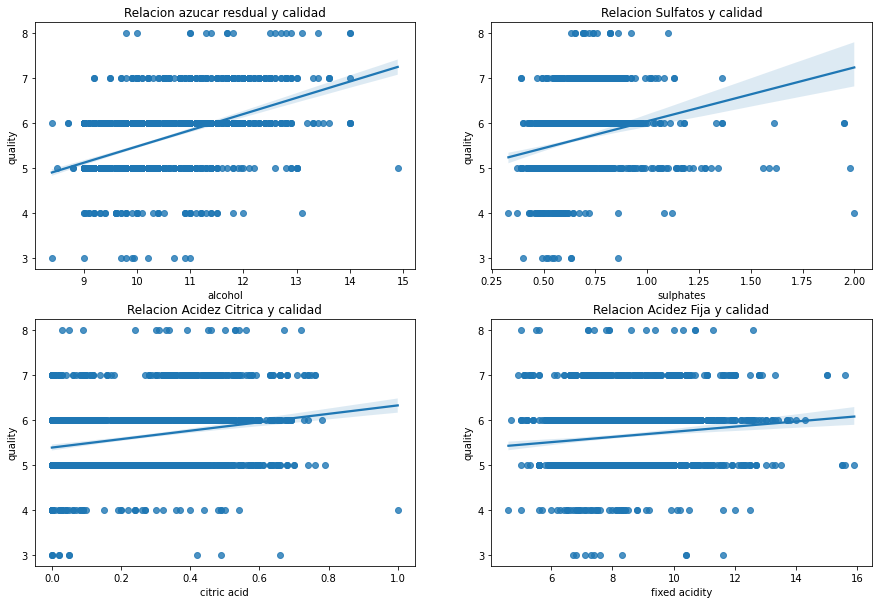

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

sns.regplot(ax = axes[0],
                x = "alcohol",
                y = "quality",
                data = df_red).set(title = "Relacion azucar resdual y calidad");

sns.regplot(ax = axes[1],
                x = "sulphates",
                y = "quality",
                data = df_red).set(title = "Relacion Sulfatos y calidad");

sns.regplot(ax = axes[2],
                x = "citric acid",
                y = "quality",
            data = df_red).set(title = "Relacion Acidez Citrica y calidad");

sns.regplot(ax = axes[3],
                x = "fixed acidity",
                y = "quality",
                data = df_red).set(title = "Relacion Acidez Fija y calidad");

Aqui podemos observar graficamente y validar la tabla de correlacion de como el alchol y los sulphates tienen a tener una correlacion mas positivas que las otras variables elegidas ( citric acid y fixed acidity).

In [6]:
df_grupo_uno = df_red[['alcohol', 'sulphates', 'citric acid', 'fixed acidity','quality']]

df_grupo_uno.groupby(by=["quality"]).mean()

,alcohol,sulphates,citric acid,fixed acidity
quality,,,,
3,9.955000,0.570000,0.171000,8.360000
4,10.265094,0.596415,0.174151,7.779245
5,9.899706,0.620969,0.243686,8.167254
6,10.632934,0.675329,0.273824,8.347179
7,11.450112,0.741256,0.375176,8.872362
8,12.094444,0.767778,0.391111,8.566667


En base a la siguiente agrupacion obtenemos las medias de los datos segun la calidad de los vinos y observamos que a mayor alcohol tienede a tener una mejor calidad, lo mismo sucede con la citric acid la cual aumenta levemente a mayor calidad

In [7]:
X = df_red.drop('quality', axis = 1)
Y= df_red[['quality']]
Y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [8]:

lm = LinearRegression()
lm

LinearRegression()

In [9]:
Z = df_red[['alcohol', 'sulphates', 'citric acid', 'fixed acidity']]
lm.fit(Z, df_red['quality'])

LinearRegression()

In [10]:
lm.intercept_

1.135864517893725

In [11]:
lm.coef_

array([0.34603281, 0.82847467, 0.31068805, 0.03175912])

Como se vio anteriormente, se debería obtener una función lineal final con la estructura:
$$
\hat{Y} = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$
Así, para este caso en particular se obtiene la siguiente función lineal:
$$
\hat{quality} = 1.135864517893726 + 0.34603281 \times alchool +  0.82847467  \times sulphates + 0.31068805 \times citric acid + 0.03175912 \times fixed acidity
$$

In [12]:
Y_hat = lm.predict(Z)

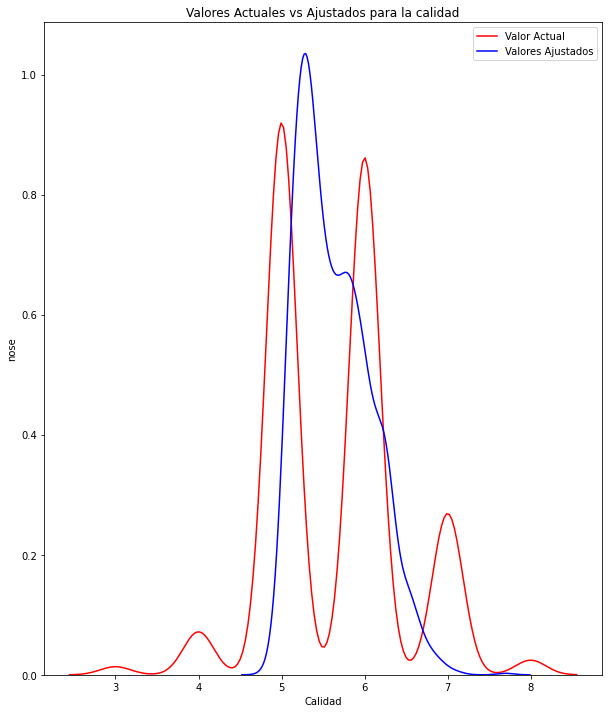

In [13]:
plt.figure(figsize=(10, 12))

ax1 = sns.kdeplot(df_red['quality'], color="r", label="Valor Actual")
sns.kdeplot(Y_hat, color="b", label="Valores Ajustados" , ax=ax1)

plt.title('Valores Actuales vs Ajustados para la calidad')
plt.xlabel('Calidad')
plt.ylabel('nose')

plt.legend(loc='upper right')

plt.show()
plt.close()

In [14]:
# ajustar el modelo 
lm.fit(Z, Y)
# encontrar el R^2
print('El valor de R-cuadrado es: ', lm.score(Z, Y))

El valor de R-cuadrado es:  0.28544441192585623


In [15]:
df_act_pre = pd.DataFrame()
df_act_pre['Actual']=Y
df_act_pre['Prediccion']=Y_hat

df_act_pre1 = df_act_pre.head(25)
print("Comparacion de los primeros 25 valores entre los valores actuales y predecidos")
df_act_pre1



Comparacion de los primeros 25 valores entre los valores actuales y predecidos


,Actual,Prediccion
0,5,5.087536
1,5,5.338070
2,5,5.325643
3,6,5.537189
4,5,5.087536
5,5,5.087536
6,5,5.039210
7,7,5.217417
8,7,5.149342
9,5,5.782030


In [16]:
df_act_pre['Prediccion'].mean()

5.6360225140712945

El valor promedio de prediccion es de un 5.6360225140712945

Aca observamos lo obtenido anteriormente de forma una forma mas visual para poder comprender mas los datos

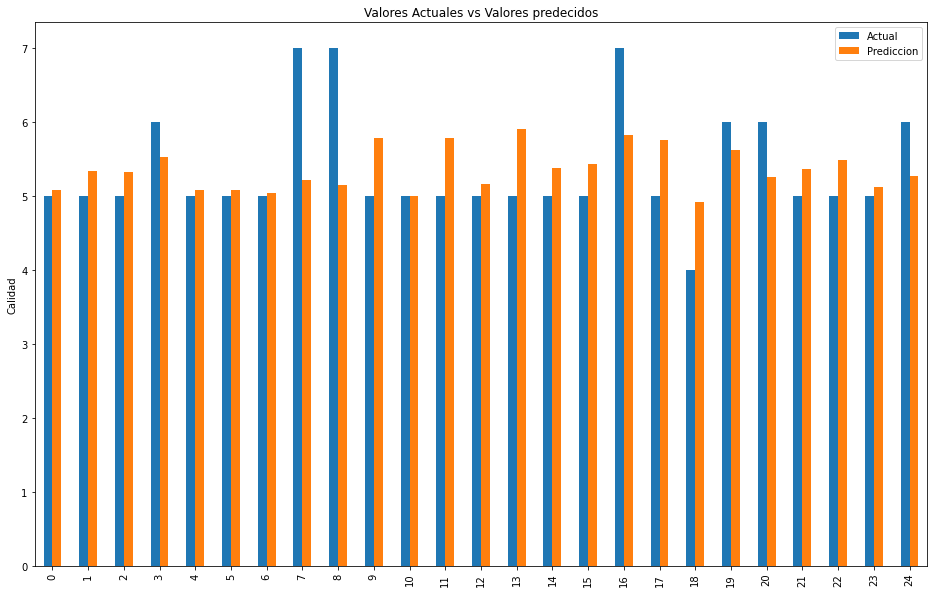

In [17]:

df_act_pre1.plot(kind='bar',figsize=(16,10))
plt.title('Valores Actuales vs Valores predecidos')
plt.ylabel('Calidad')
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df_red['quality'], Y_hat)
mae= mean_absolute_error(df_red['quality'],Y_hat)
error=np.sqrt(mse)

print('Error absoluto medio(MAE):', mae)
print('Error cuadrático medio(MSE):', mse)
print('Distancia media cuadrática mínima:', error)


Error absoluto medio(MAE): 0.5293069596993891
Error cuadrático medio(MSE): 0.46571913582233854
Distancia media cuadrática mínima: 0.6824361771054774


## Conclusion
Vemos que el valor de la raíz del error cuadrático medio es 0,62, que es un 12 % del valor medio, que es 5,63. Esto significa que nuestro algoritmo no era muy preciso, pero aun así puede hacer predicciones razonablemente buenas.

Hay muchos factores que pueden haber contribuido a esta inexactitud, por ejemplo:

Necesita más datos: necesitamos tener una gran cantidad de datos para obtener la mejor predicción posible.

Es posible que las características que usamos no hayan tenido una correlación lo suficientemente alta con los valores que intentábamos predecir. Pero lamentabalmente segun los datos de correlacion las variables utilizadas eran los que tenian mas correlacion con la variable de calidad.


## Validación Cruzada

La **validación cruzada** es un método de re-muestreo que se utiliza para evaluar modelos de aprendizaje automático cuando la muestra de datos es limitada y se usa principalmente para estimar la capacidad de un modelo de aprendizaje automático con datos no conocidos

In [29]:
from sklearn.model_selection import train_test_split

x_entrena, x_prueba, y_entrena, y_prueba = train_test_split(X, Y, test_size=0.10, random_state=1)

print("número de muestras de prueba:", x_prueba.shape[0])
print("número de muestras de entrenamiento:",x_entrena.shape[0])

número de muestras de prueba: 160
número de muestras de entrenamiento: 1439


In [21]:
from sklearn.model_selection import cross_val_score

R_cruce = cross_val_score(lm, X, Y, cv=4)
R_cruce

array([0.20232724, 0.28556931, 0.37251738, 0.28017209])

In [22]:
print("El promedio de cada iteración es ", R_cruce.mean(), "y la desviación estándar es " , R_cruce.std())

El promedio de cada iteración es  0.2851465037207833 y la desviación estándar es  0.06024455093592457


In [24]:
-1 * cross_val_score(lm,X, Y,cv=4,scoring='neg_mean_squared_error')

array([0.44220984, 0.43323077, 0.44670488, 0.45606599])

In [31]:
reg_lin = LinearRegression()
reg_lin.fit(x_entrena[['alcohol', 'sulphates', 'citric acid', 'fixed acidity']], y_entrena)


LinearRegression()

In [32]:
y_hat_entrena = reg_lin.predict(x_entrena[['alcohol', 'sulphates', 'citric acid', 'fixed acidity']])
y_hat_entrena[0:5]

array([[5.98281225],
       [5.30955519],
       [5.28136844],
       [5.34329817],
       [6.27060946]])

In [33]:
y_hat_prueba = reg_lin.predict(x_prueba[['alcohol', 'sulphates', 'citric acid', 'fixed acidity']])
y_hat_prueba[0:5]

array([[5.78522857],
       [5.54860578],
       [6.13310295],
       [5.55077237],
       [6.45141692]])

In [60]:
reg_lin.score(x_entrena[['alcohol', 'sulphates', 'citric acid', 'fixed acidity']], y_entrena)

0.28229952488233434

In [61]:
reg_lin.score(x_prueba[['alcohol', 'sulphates', 'citric acid', 'fixed acidity']], y_prueba)

0.32275461285286733

In [47]:
def GraficoDistribucion(FuncionRoja, FuncionAzul, NombreRojo, NombreAzul, Titulo):
    ancho = 12
    alto = 10
    plt.figure(figsize=(ancho, alto))

    ax1 = sns.kdeplot(FuncionRoja, color="r", label=NombreRojo)
    ax2 = sns.kdeplot(FuncionAzul, color="b", label=NombreAzul, ax=ax1)

    plt.title(Titulo)
    plt.xlabel('Calidad')
    plt.ylabel('Proporción')
    plt.legend(loc='upper right')

    plt.show()
    plt.close()

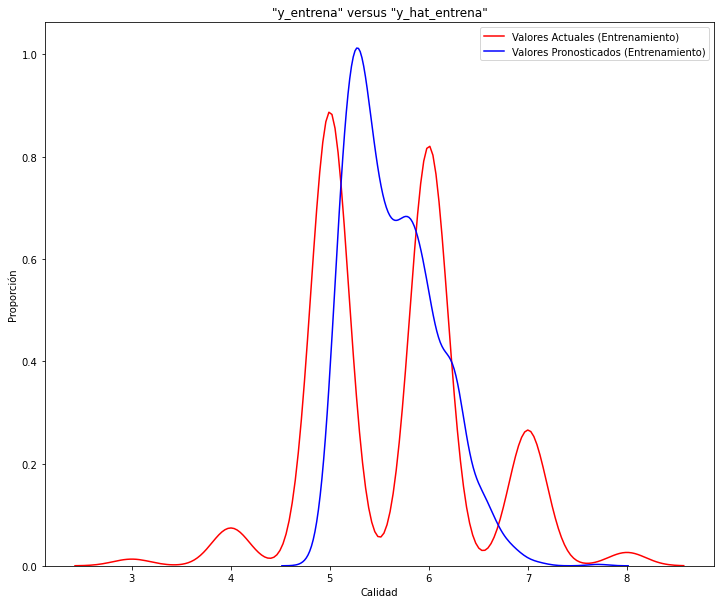

In [48]:
Titulo = '\"y_entrena\" versus \"y_hat_entrena\"'
GraficoDistribucion(y_entrena['quality'], y_hat_entrena[:,0], "Valores Actuales (Entrenamiento)", "Valores Pronosticados (Entrenamiento)", Titulo)

In [42]:
y_entrena['quality'].head(25)

495     8
1113    6
299     5
577     5
1242    6
1592    6
1233    4
414     5
994     5
1011    6
496     6
918     6
927     4
638     7
462     5
223     6
1211    5
1501    5
285     5
536     5
1343    6
653     6
1539    5
614     6
1586    6
Name: quality, dtype: int64

In [44]:
y_hat_entrena

array([[5.98281225],
       [5.30955519],
       [5.28136844],
       ...,
       [5.51964098],
       [4.957889  ],
       [6.47837202]])

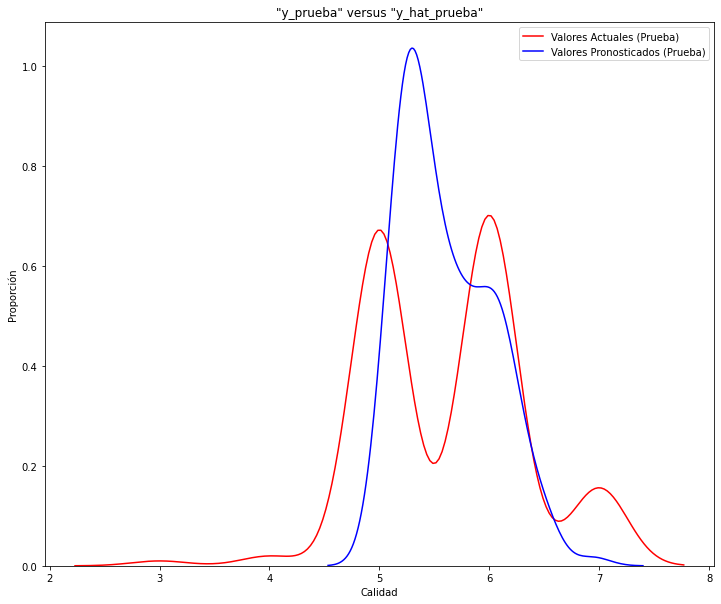

In [49]:
Titulo = '\"y_prueba\" versus \"y_hat_prueba\"'
GraficoDistribucion(y_prueba['quality'], y_hat_prueba[:,0], "Valores Actuales (Prueba)", "Valores Pronosticados (Prueba)", Titulo)